# Principal Component Analysis (PCA) in Python

Principal component analysis is a technique used to reduce the dimensionality of a data set. PCA is typically employed prior to implementing a machine learning algorithm because it minimizes the number of variables used to explain the maximum amount of variance for a given data set.

#PCA Introduction
PCA uses "orthogonal linear transformation" to project the features of a data set onto a new coordinate system where the feature which explains the most variance is positioned at the first coordinate (thus becoming the first principal component). Source

PCA allows us to quantify the trade-offs between the number of features we utilize and the total variance explained by the data. PCA allows us to determine which features capture similiar information and discard them to create a more parsimonious model.

In order to perform PCA we need to do the following:

1)Standardize the data. 

2)Use the standardized data to create a covariance matrix.

3)Use the resulting matrix to calculate eigenvectors (principal components) and their corresponding eigenvalues. 

4)Sort the components in decending order by its eigenvalue. 

5)Choose n components which explain the most variance within the data (larger eigenvalue means the feature explains more variance). 

6)Create a new matrix using the n components. 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import scale 

from sklearn.decomposition import PCA
import seaborn as sb
%matplotlib inline

In [6]:
sb.set(font_scale=1.2,style="whitegrid") #set styling preferences

In [82]:
df= pd.read_csv(r'E:\ML\PCA\loan1.csv')
# df.sample(frac = .25) read the dataset and sample 25% of it


In [83]:
#Data Wrangling
df.replace([np.inf, -np.inf], np.nan) #convert infs to nans

df = df.dropna(axis=1, how='any') #remove nans
df = df._get_numeric_data() #keep only numeric features


# Step 1: Standardize the Dataset

In [84]:
x = df.values #convert the data into a numpy array
x = scale(x);x


array([[-1.31559006, -1.31559006, -1.31492255, ..., -0.69057247,
         0.27077637, -0.62084408],
       [ 1.32751203,  1.32751203,  1.32752178, ...,  0.73783113,
        -0.50880439,  0.86941003],
       [-1.07530805, -1.07530805, -1.07470033, ..., -0.77970173,
        -0.55231588, -0.78025347],
       ...,
       [-0.62357788, -0.62357788, -0.62308258, ..., -0.3731187 ,
        -0.9221635 , -0.21141076],
       [-1.21947726, -1.21947726, -1.21883366, ..., -0.56964594,
        -0.72998777, -0.50578048],
       [-0.11418002, -0.11418002, -0.11381149, ..., -0.75914941,
        -0.65384268, -0.50220927]])

# Step 2: Create a Covariance Matrix

In [85]:
covar_matrix = PCA(n_components = 40) #we have 40 features

# Step 3: Calculate Eigenvalues

In [86]:
covar_matrix.fit(x)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([19.5, 31.6, 39.5, 46.2, 52.1, 56.2, 60. , 63.2, 65.8, 68.2, 70.3,
       72.2, 73.9, 75.6, 77.3, 79. , 80.6, 82.2, 83.7, 85.2, 86.7, 88. ,
       89.3, 90.5, 91.6, 92.5, 93.3, 94.1, 94.8, 95.5, 96.2, 96.8, 97.4,
       97.9, 98.3, 98.7, 99. , 99.3, 99.5, 99.7])

In the above array we see that the first feature explains roughly 19.5% of the variance within our data set while the first two explain 31.6 and so on. If we employ 24 features we capture 89.3% of the variance within the dataset, thus we gain very little by implementing an additional feature (think of this as diminishing marginal return on total variance explained).

# Step 4, 5 & 6: Sort & Select

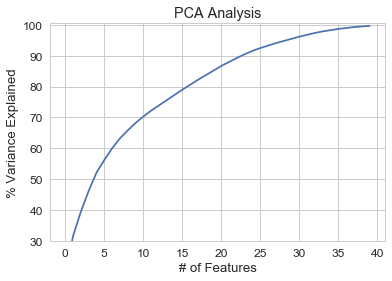

In [87]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

Based on the plot above always pick  % variance near to 100   with -- no of features

# Here origional data set contain 120 f column so
# If we employ 20 c features we capture 90% of the variance within the dataset

# This is just example